In [303]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [304]:
data_loc = "match data/data"
df = pd.read_csv(data_loc)
df.fillna(0, inplace=True)

df.head(10)

,fixture_id,halftime,current_time,half_start_datetime,match_start_datetime,minute,second,latest_bookmaker_update,suspended,stopped,...,Throwins - home,Total Crosses - away,Total Crosses - home,Yellowcards - away,Yellowcards - home,Yellowred Cards - away,Yellowred Cards - home,current_state,final_score,result
0,19172016.0,1st-half,2024-08-09 18:11:36,2024-08-09 18:01:37,2024-08-09 18:01:37,9,59,2024-08-09 18:11:28,False,False,...,1.0,0.0,3.0,0.0,0.0,0.0,0.0,X,2-1,1
1,19172016.0,1st-half,2024-08-09 18:27:30,2024-08-09 18:01:37,2024-08-09 18:01:37,25,53,2024-08-09 18:27:24,False,False,...,11.0,1.0,12.0,0.0,0.0,0.0,0.0,X,2-1,1
2,19172016.0,1st-half,2024-08-09 18:28:25,2024-08-09 18:01:37,2024-08-09 18:01:37,26,48,2024-08-09 18:28:20,False,False,...,11.0,1.0,13.0,0.0,0.0,0.0,0.0,X,2-1,1
3,19172016.0,1st-half,2024-08-09 18:29:32,2024-08-09 18:01:37,2024-08-09 18:01:37,27,55,2024-08-09 18:29:28,False,False,...,11.0,1.0,13.0,0.0,0.0,0.0,0.0,X,2-1,1
4,19172016.0,1st-half,2024-08-09 18:30:37,2024-08-09 18:01:37,2024-08-09 18:01:37,29,0,2024-08-09 18:30:32,True,False,...,11.0,1.0,14.0,0.0,0.0,0.0,0.0,X,2-1,1
5,19172016.0,1st-half,2024-08-09 18:31:18,2024-08-09 18:01:37,2024-08-09 18:01:37,29,41,2024-08-09 18:31:17,True,False,...,11.0,1.0,14.0,0.0,0.0,0.0,0.0,X,2-1,1
6,19172016.0,1st-half,2024-08-09 18:32:24,2024-08-09 18:01:37,2024-08-09 18:01:37,30,47,2024-08-09 18:32:22,True,False,...,11.0,1.0,14.0,0.0,0.0,0.0,0.0,X,2-1,1
7,19172016.0,1st-half,2024-08-09 18:33:27,2024-08-09 18:01:37,2024-08-09 18:01:37,31,50,2024-08-09 18:33:21,True,False,...,11.0,1.0,14.0,0.0,0.0,0.0,0.0,X,2-1,1
8,19172016.0,1st-half,2024-08-09 18:34:18,2024-08-09 18:01:37,2024-08-09 18:01:37,32,41,2024-08-09 18:34:12,False,False,...,11.0,1.0,14.0,0.0,0.0,0.0,0.0,X,2-1,1
9,19172016.0,1st-half,2024-08-09 18:35:27,2024-08-09 18:01:37,2024-08-09 18:01:37,33,50,2024-08-09 18:35:26,False,False,...,11.0,1.0,15.0,0.0,0.0,0.0,0.0,X,2-1,1


In [305]:
print(f"Before suspended or stopped games are dropped: {len(df)}")

columns_to_check = [
    "suspended",
    "stopped"
    ]

mask = (df[columns_to_check] == False).all(axis=1)

df = df[mask]

print(f"After suspended or stopped games are dropped: {len(df)}")

Before suspended or stopped games are dropped: 63944
After suspended or stopped games are dropped: 56127


## Calculation of Probabilities of Match Outcomes

In [306]:
df_odds = df.copy()
results = df_odds['result']
half = df_odds['halftime']
df_odds = df_odds.loc[:, "1":"X"]

df_odds.head()

,1,2,X
0,1.22,10.0,6.5
1,1.20,13.0,6.0
2,1.20,13.0,6.0
3,1.20,13.0,6.0
8,1.20,15.0,6.0


In [307]:
prob_df = 1 / df_odds
prob_df.columns = ["Pr{Home Win}", "Pr{Away Win}", "Pr{Draw}"]

normalized_prob_df = prob_df.div(prob_df.sum(axis=1), axis=0)

prob_df["Result"] = results
prob_df["Half"] = half
normalized_prob_df["Result"] = results
normalized_prob_df["Half"] = half

prob_df.head()

,Pr{Home Win},Pr{Away Win},Pr{Draw},Result,Half
0,0.819672,0.100000,0.153846,1,1st-half
1,0.833333,0.076923,0.166667,1,1st-half
2,0.833333,0.076923,0.166667,1,1st-half
3,0.833333,0.076923,0.166667,1,1st-half
8,0.833333,0.066667,0.166667,1,1st-half


In [308]:
normalized_prob_df.head()

,Pr{Home Win},Pr{Away Win},Pr{Draw},Result,Half
0,0.763538,0.093152,0.143310,1,1st-half
1,0.773810,0.071429,0.154762,1,1st-half
2,0.773810,0.071429,0.154762,1,1st-half
3,0.773810,0.071429,0.154762,1,1st-half
8,0.781250,0.062500,0.156250,1,1st-half


In [309]:
bins = [-1, -0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75, 1]

prob_df["Pr{Home Win} - Pr{Away Win}"] = prob_df["Pr{Home Win}"] - prob_df["Pr{Away Win}"]
prob_df["Bin"] = pd.cut(prob_df["Pr{Home Win} - Pr{Away Win}"], bins)

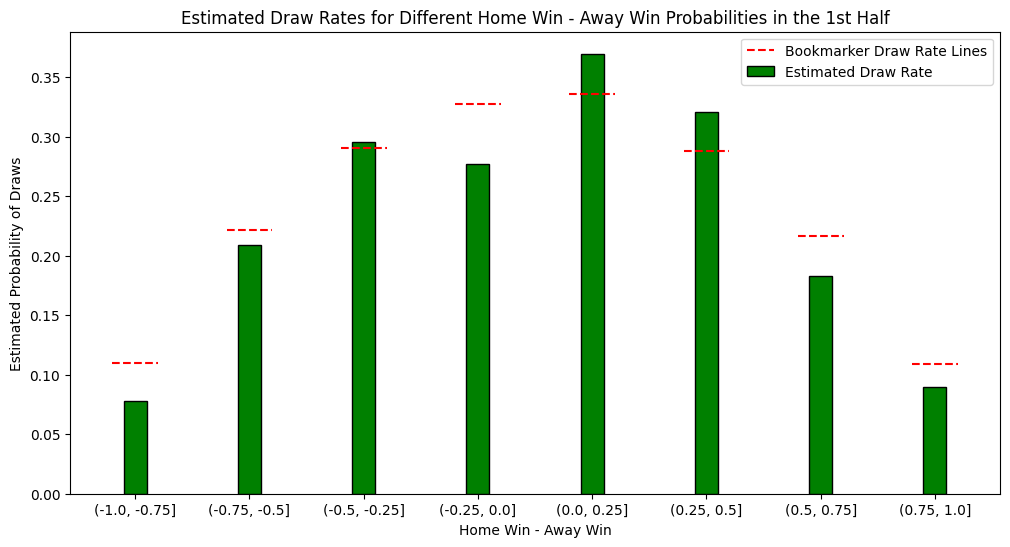

In [310]:
first_half_prob_df = prob_df[prob_df["Half"] == "1st-half"]

bin_totals = first_half_prob_df.groupby("Bin", observed=False).size()
bin_draws = first_half_prob_df[first_half_prob_df["Result"] == "X"].groupby("Bin", observed=False).size()

estimated_draws = bin_draws / bin_totals

bookmarker_draws = first_half_prob_df.groupby("Bin", observed=False)["Pr{Draw}"].mean()

plt.figure(figsize=(12, 6))

plt.bar(bin_totals.index.astype(str), estimated_draws , width=0.2, align="center", edgecolor = "black", color = "green", label="Estimated Draw Rate")
plt.hlines(
    y=bookmarker_draws,                  
    xmin=-0.2 + np.arange(len(bookmarker_draws)),  
    xmax=0.2 + np.arange(len(bookmarker_draws)),  
    colors="red",
    linestyles="--",
    label="Bookmarker Draw Rate Lines")

plt.legend(loc="upper right")
plt.xlabel("Home Win - Away Win")
plt.ylabel("Estimated Probability of Draws")
plt.title("Estimated Draw Rates for Different Home Win - Away Win Probabilities in the 1st Half")

plt.show()

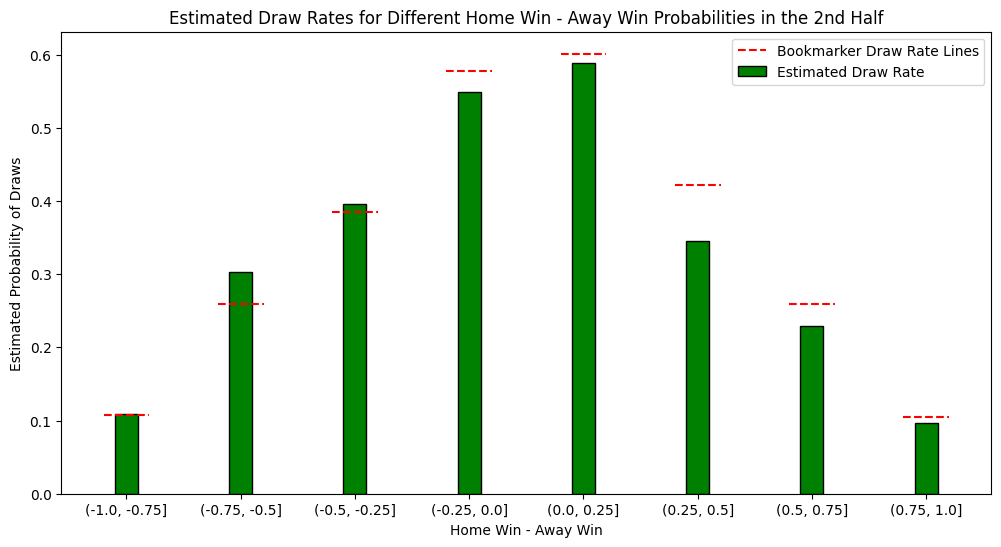

In [311]:
second_half_prob_df = prob_df[prob_df["Half"] == "2nd-half"]

bin_totals = second_half_prob_df.groupby("Bin", observed=False).size()
bin_draws = second_half_prob_df[second_half_prob_df["Result"] == "X"].groupby("Bin", observed=False).size()

estimated_draws = bin_draws / bin_totals

bookmarker_draws = second_half_prob_df.groupby("Bin", observed=False)["Pr{Draw}"].mean()

plt.figure(figsize=(12, 6))

plt.bar(bin_totals.index.astype(str), estimated_draws , width=0.2, align="center", edgecolor = "black", color = "green", label="Estimated Draw Rate")
plt.hlines(
    y=bookmarker_draws,                  
    xmin=-0.2 + np.arange(len(bookmarker_draws)),  
    xmax=0.2 + np.arange(len(bookmarker_draws)),  
    colors="red",
    linestyles="--",
    label="Bookmarker Draw Rate Lines")

plt.legend(loc="upper right")
plt.xlabel("Home Win - Away Win")
plt.ylabel("Estimated Probability of Draws")
plt.title("Estimated Draw Rates for Different Home Win - Away Win Probabilities in the 2nd Half")

plt.show()

In [312]:
normalized_prob_df["Pr{Home Win} - Pr{Away Win}"] = normalized_prob_df["Pr{Home Win}"] - normalized_prob_df["Pr{Away Win}"]
normalized_prob_df["Bin"] = pd.cut(normalized_prob_df["Pr{Home Win} - Pr{Away Win}"], bins)

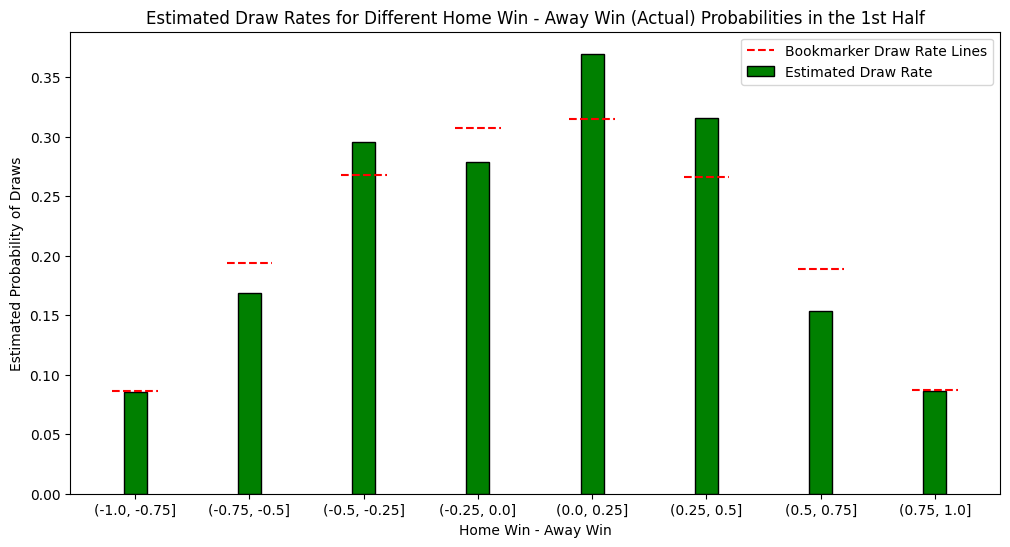

In [313]:
first_half_normalized_prob_df = normalized_prob_df[normalized_prob_df["Half"] == "1st-half"]

bin_totals = first_half_normalized_prob_df.groupby("Bin", observed=False).size()
bin_draws = first_half_normalized_prob_df[first_half_normalized_prob_df["Result"] == "X"].groupby("Bin", observed=False).size()

estimated_draws = bin_draws / bin_totals

bookmarker_draws = first_half_normalized_prob_df.groupby("Bin", observed=False)["Pr{Draw}"].mean()

plt.figure(figsize=(12, 6))

plt.bar(bin_totals.index.astype(str), estimated_draws , width=0.2, align="center", edgecolor = "black", color = "green", label="Estimated Draw Rate")
plt.hlines(
    y=bookmarker_draws,                  
    xmin=-0.2 + np.arange(len(bookmarker_draws)),  
    xmax=0.2 + np.arange(len(bookmarker_draws)),  
    colors="red",
    linestyles="--",
    label="Bookmarker Draw Rate Lines")

plt.legend(loc="upper right")
plt.xlabel("Home Win - Away Win")
plt.ylabel("Estimated Probability of Draws")
plt.title("Estimated Draw Rates for Different Home Win - Away Win (Actual) Probabilities in the 1st Half")

plt.show()

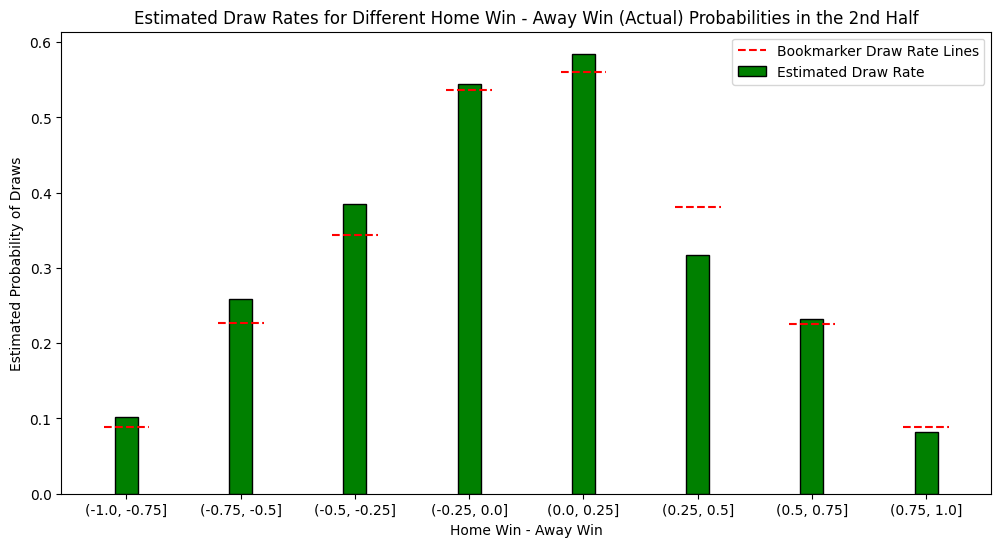

In [314]:
second_half_normalized_prob_df = normalized_prob_df[normalized_prob_df["Half"] == "2nd-half"]

bin_totals = second_half_normalized_prob_df.groupby("Bin", observed=False).size()
bin_draws = second_half_normalized_prob_df[second_half_normalized_prob_df["Result"] == "X"].groupby("Bin", observed=False).size()

estimated_draws = bin_draws / bin_totals

bookmarker_draws = second_half_normalized_prob_df.groupby("Bin", observed=False)["Pr{Draw}"].mean()

plt.figure(figsize=(12, 6))

plt.bar(bin_totals.index.astype(str), estimated_draws , width=0.2, align="center", edgecolor = "black", color = "green", label="Estimated Draw Rate")
plt.hlines(
    y=bookmarker_draws,                  
    xmin=-0.2 + np.arange(len(bookmarker_draws)),  
    xmax=0.2 + np.arange(len(bookmarker_draws)),  
    colors="red",
    linestyles="--",
    label="Bookmarker Draw Rate Lines")

plt.legend(loc="upper right")
plt.xlabel("Home Win - Away Win")
plt.ylabel("Estimated Probability of Draws")
plt.title("Estimated Draw Rates for Different Home Win - Away Win (Actual) Probabilities in the 2nd Half")

plt.show()

### Removing Noisy Data

In [315]:
df["Goal_in_first_10_mins"] = df.apply(
    lambda row: True if row["halftime"] == "1st-half" and row["minute"] < 10 and (row["Goals - home"] + row["Goals - away"] >= 1) 
    else False,
    axis=1)

columns_to_keep = ["fixture_id", "halftime", "minute", "Goals - away", "Goals - home"]
matches = df.copy()
matches = matches[columns_to_keep]
matches["Total Goals"] = matches["Goals - away"] + matches["Goals - home"]
matches = matches[(matches["minute"] < 40) & (matches["halftime"] == "2nd-half")]
matches = matches.loc[matches.groupby("fixture_id")["Total Goals"].idxmax()]
matches.drop(columns=["Goals - away", "Goals - home", "halftime", "minute"], inplace=True)
df["Goal_after_80_mins"] = df.apply(
    lambda row: True if row["minute"] >= 40 and row["halftime"] == "2nd-half" and
    (row["Goals - home"] + row["Goals - away"]) > matches[matches["fixture_id"] == row["fixture_id"]]["Total Goals"].values[0] 
    else False,
    axis=1)

df["Redcard_in_first_15_mins"] = df.apply(
    lambda row: True if (row["halftime"] == "1st-half" and row["minute"] < 15) 
    and (row["Redcards - home"] + row["Redcards - away"] + row["Yellowred Cards - home"] + row["Yellowred Cards - away"] >= 1) 
    else False,
    axis=1)

columns_to_keep = ["fixture_id", "halftime", "minute", "Redcards - away", "Redcards - home", "Yellowred Cards - away", "Yellowred Cards - home"]
matches = df.copy()
matches = matches[columns_to_keep]
matches["Total Red Cards"] = matches["Redcards - away"] + matches["Redcards - home"] + matches["Yellowred Cards - away"] + matches["Yellowred Cards - home"]
matches = matches[(matches["minute"] < 35) & (matches["halftime"] == "2nd-half")]
matches = matches.loc[matches.groupby("fixture_id")["Total Red Cards"].idxmax()]
matches.drop(columns=["Redcards - away", "Redcards - home", "Yellowred Cards - away", "Yellowred Cards - home" ,"halftime", "minute"], inplace=True)
df["Red_cards_after_75_mins"] = df.apply(
    lambda row: True if row["minute"] >= 35 and row["halftime"] == "2nd-half" and
    (row["Redcards - home"] + row["Redcards - away"] + row["Yellowred Cards - away"] + row["Yellowred Cards - home"]) > matches[matches["fixture_id"] == row["fixture_id"]]["Total Red Cards"].values[0] 
    else False,
    axis=1)

df["Yellowcard_in_first_10_mins"] = df.apply(
    lambda row: True if row["halftime"] == "1st-half" and row["minute"] < 10 and (row["Yellowcards - home"] + row["Yellowcards - away"] >= 1)
    else False,
    axis=1)

df["Injuries_in_first_30_mins"] = df.apply(
    lambda row: True if (row["halftime"] == "1st-half") and row["minute"] < 30 and (row["Injuries - home"] + row["Injuries - away"] >= 1) 
    else False,
    axis=1)

columns_to_keep = ["fixture_id", "halftime", "minute", "Injuries - away", "Injuries - home"]
matches = df.copy()
matches = matches[columns_to_keep]
matches["Total Injuries"] = matches["Injuries - away"] + matches["Injuries - home"]
matches = matches[(matches["minute"] < 40) & (matches["halftime"] == "2nd-half")]
matches = matches.loc[matches.groupby("fixture_id")["Total Injuries"].idxmax()]
matches.drop(columns=["Injuries - away", "Injuries - home", "halftime", "minute"], inplace=True)
df["Injuries_after_80_mins"] = df.apply(
    lambda row: True if row["minute"] >= 40 and row["halftime"] == "2nd-half" and
    (row["Injuries - home"] + row["Injuries - away"]) > matches[matches["fixture_id"] == row["fixture_id"]]["Total Injuries"].values[0] 
    else False,
    axis=1)

df["Substutions_in_first_30_mins"] = df.apply(
    lambda row: True if row["halftime"] == "1st-half" and row["minute"] < 30 and (row["Substitutions - home"] + row["Substitutions - away"] >= 1) 
    else False,
    axis=1)

In [316]:
print(f"Number of matches with a goal before 10 minutes: {df['Goal_in_first_10_mins'].sum()}")
print(f"Number of matches with a goal after 80 minutes: {df['Goal_after_80_mins'].sum()}")
print(f"Number of matches with a red card before 15 minutes: {df['Redcard_in_first_15_mins'].sum()}")
print(f"Number of matches with a red card after 75 minutes: {df['Red_cards_after_75_mins'].sum()}")
print(f"Number of matches with a yellow card before 10 minutes: {df['Yellowcard_in_first_10_mins'].sum()}")
print(f"Number of matches with an injury before 30 minutes: {df['Injuries_in_first_30_mins'].sum()}")
print(f"Number of matches with an injury after 80 minutes: {df['Injuries_after_80_mins'].sum()}")
print(f"Number of matches with a substitutions before 30 minutes: {df['Substutions_in_first_30_mins'].sum()}")

Number of matches with a goal before 10 minutes: 512
Number of matches with a goal after 80 minutes: 576
Number of matches with a red card before 15 minutes: 11
Number of matches with a red card after 75 minutes: 306
Number of matches with a yellow card before 10 minutes: 196
Number of matches with an injury before 30 minutes: 490
Number of matches with an injury after 80 minutes: 289
Number of matches with a substitutions before 30 minutes: 784


In [317]:
print(f"Current number of rows: {len(df)}")
a = len(df)

columns_to_check = [
    "Goal_in_first_10_mins",
    "Redcard_in_first_15_mins",
    "Yellowcard_in_first_10_mins",
    "Injuries_in_first_30_mins",
    "Goal_after_80_mins",
    "Substutions_in_first_30_mins",
    "Red_cards_after_75_mins",
    "Injuries_after_80_mins"
]

mask = (df[columns_to_check] == False).all(axis=1)

df = df[mask]

df = df.drop(columns=columns_to_check)

print(f"Number of rows after removing matches with events: {len(df)}")
print(f"Difference in number of rows: {a - len(df)}")

Current number of rows: 56127
Number of rows after removing matches with events: 53177
Difference in number of rows: 2950


In [318]:
df_odds = df.copy()
results = df_odds['result']
half = df_odds['halftime']
df_odds = df_odds.loc[:, "1":"X"]

prob_df = 1 / df_odds
prob_df.columns = ["Pr{Home Win}", "Pr{Away Win}", "Pr{Draw}"]

normalized_prob_df = prob_df.div(prob_df.sum(axis=1), axis=0)

prob_df["Result"] = results
prob_df["Half"] = half
normalized_prob_df["Result"] = results
normalized_prob_df["Half"] = half

In [319]:
prob_df["Pr{Home Win} - Pr{Away Win}"] = prob_df["Pr{Home Win}"] - prob_df["Pr{Away Win}"]
prob_df["Bin"] = pd.cut(prob_df["Pr{Home Win} - Pr{Away Win}"], bins)

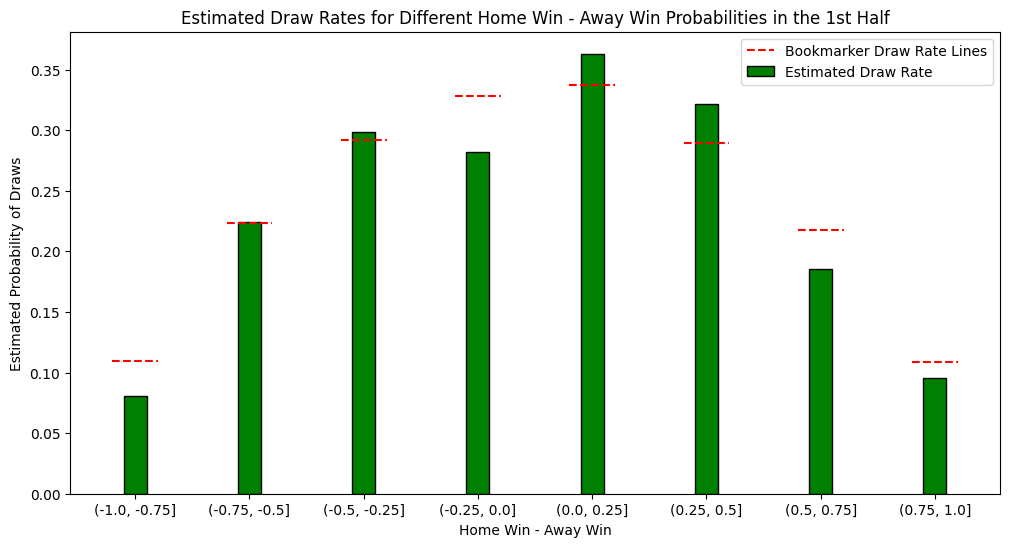

In [320]:
first_half_prob_df = prob_df[prob_df["Half"] == "1st-half"]

bin_totals = first_half_prob_df.groupby("Bin", observed=False).size()
bin_draws = first_half_prob_df[first_half_prob_df["Result"] == "X"].groupby("Bin", observed=False).size()

estimated_draws = bin_draws / bin_totals

bookmarker_draws = first_half_prob_df.groupby("Bin", observed=False)["Pr{Draw}"].mean()

plt.figure(figsize=(12, 6))

plt.bar(bin_totals.index.astype(str), estimated_draws , width=0.2, align="center", edgecolor = "black", color = "green", label="Estimated Draw Rate")
plt.hlines(
    y=bookmarker_draws,                  
    xmin=-0.2 + np.arange(len(bookmarker_draws)),  
    xmax=0.2 + np.arange(len(bookmarker_draws)),  
    colors="red",
    linestyles="--",
    label="Bookmarker Draw Rate Lines")

plt.legend(loc="upper right")
plt.xlabel("Home Win - Away Win")
plt.ylabel("Estimated Probability of Draws")
plt.title("Estimated Draw Rates for Different Home Win - Away Win Probabilities in the 1st Half")

plt.show()

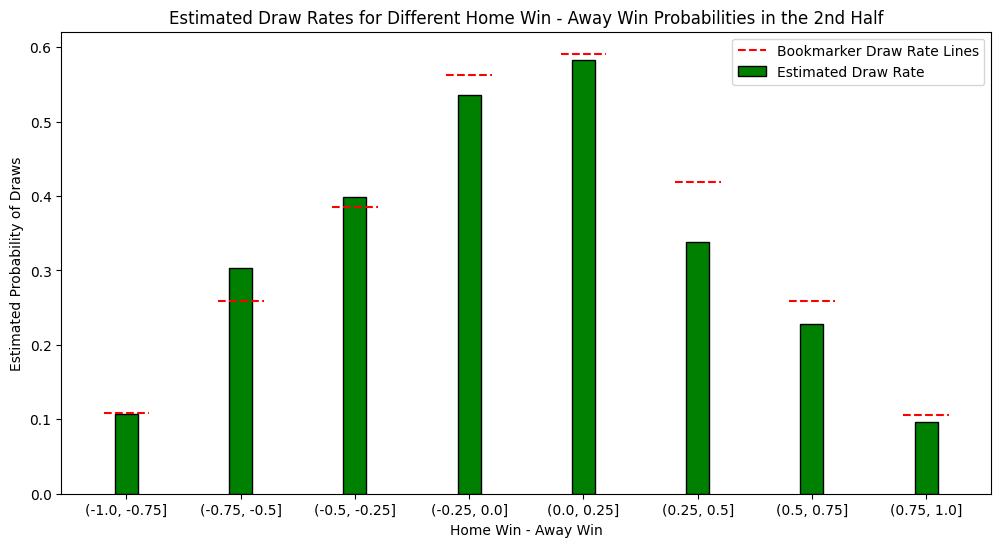

In [321]:
second_half_prob_df = prob_df[prob_df["Half"] == "2nd-half"]

bin_totals = second_half_prob_df.groupby("Bin", observed=False).size()
bin_draws = second_half_prob_df[second_half_prob_df["Result"] == "X"].groupby("Bin", observed=False).size()

estimated_draws = bin_draws / bin_totals

bookmarker_draws = second_half_prob_df.groupby("Bin", observed=False)["Pr{Draw}"].mean()

plt.figure(figsize=(12, 6))

plt.bar(bin_totals.index.astype(str), estimated_draws , width=0.2, align="center", edgecolor = "black", color = "green", label="Estimated Draw Rate")
plt.hlines(
    y=bookmarker_draws,                  
    xmin=-0.2 + np.arange(len(bookmarker_draws)),  
    xmax=0.2 + np.arange(len(bookmarker_draws)),  
    colors="red",
    linestyles="--",
    label="Bookmarker Draw Rate Lines")

plt.legend(loc="upper right")
plt.xlabel("Home Win - Away Win")
plt.ylabel("Estimated Probability of Draws")
plt.title("Estimated Draw Rates for Different Home Win - Away Win Probabilities in the 2nd Half")

plt.show()

In [322]:
normalized_prob_df["Pr{Home Win} - Pr{Away Win}"] = normalized_prob_df["Pr{Home Win}"] - normalized_prob_df["Pr{Away Win}"]
normalized_prob_df["Bin"] = pd.cut(normalized_prob_df["Pr{Home Win} - Pr{Away Win}"], bins)

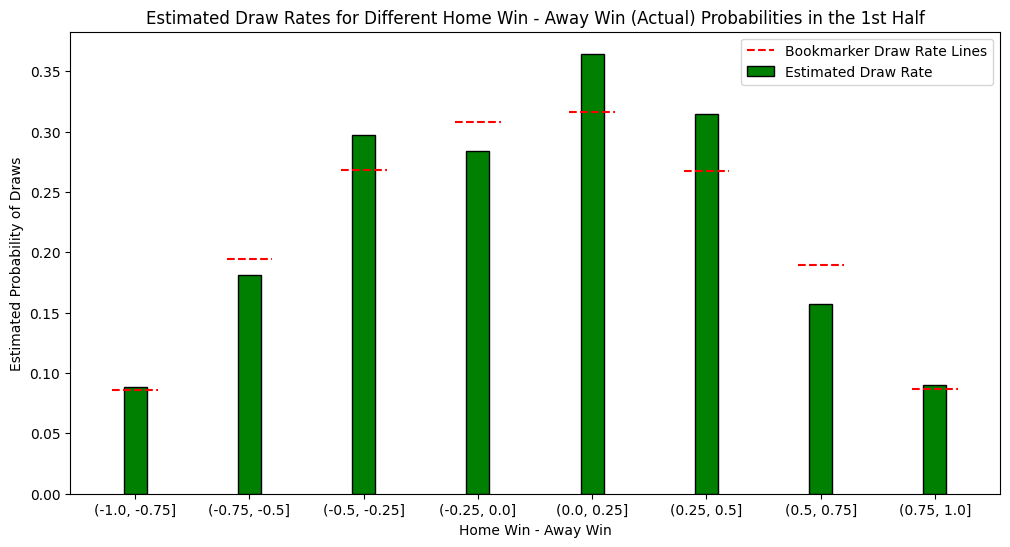

In [323]:
first_half_normalized_prob_df = normalized_prob_df[normalized_prob_df["Half"] == "1st-half"]

bin_totals = first_half_normalized_prob_df.groupby("Bin", observed=False).size()
bin_draws = first_half_normalized_prob_df[first_half_normalized_prob_df["Result"] == "X"].groupby("Bin", observed=False).size()

estimated_draws = bin_draws / bin_totals

bookmarker_draws = first_half_normalized_prob_df.groupby("Bin", observed=False)["Pr{Draw}"].mean()

plt.figure(figsize=(12, 6))

plt.bar(bin_totals.index.astype(str), estimated_draws , width=0.2, align="center", edgecolor = "black", color = "green", label="Estimated Draw Rate")
plt.hlines(
    y=bookmarker_draws,                  
    xmin=-0.2 + np.arange(len(bookmarker_draws)),  
    xmax=0.2 + np.arange(len(bookmarker_draws)),  
    colors="red",
    linestyles="--",
    label="Bookmarker Draw Rate Lines")

plt.legend(loc="upper right")
plt.xlabel("Home Win - Away Win")
plt.ylabel("Estimated Probability of Draws")
plt.title("Estimated Draw Rates for Different Home Win - Away Win (Actual) Probabilities in the 1st Half")

plt.show()

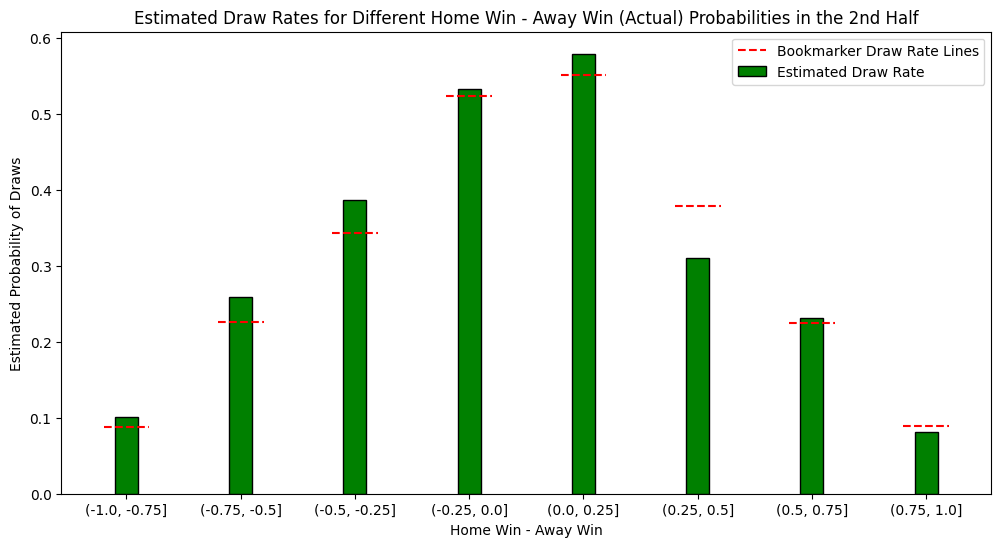

In [324]:
second_half_normalized_prob_df = normalized_prob_df[normalized_prob_df["Half"] == "2nd-half"]

bin_totals = second_half_normalized_prob_df.groupby("Bin", observed=False).size()
bin_draws = second_half_normalized_prob_df[second_half_normalized_prob_df["Result"] == "X"].groupby("Bin", observed=False).size()

estimated_draws = bin_draws / bin_totals

bookmarker_draws = second_half_normalized_prob_df.groupby("Bin", observed=False)["Pr{Draw}"].mean()

plt.figure(figsize=(12, 6))

plt.bar(bin_totals.index.astype(str), estimated_draws , width=0.2, align="center", edgecolor = "black", color = "green", label="Estimated Draw Rate")
plt.hlines(
    y=bookmarker_draws,                  
    xmin=-0.2 + np.arange(len(bookmarker_draws)),  
    xmax=0.2 + np.arange(len(bookmarker_draws)),  
    colors="red",
    linestyles="--",
    label="Bookmarker Draw Rate Lines")

plt.legend(loc="upper right")
plt.xlabel("Home Win - Away Win")
plt.ylabel("Estimated Probability of Draws")
plt.title("Estimated Draw Rates for Different Home Win - Away Win (Actual) Probabilities in the 2nd Half")

plt.show()

### Fitting a Decision Tree to Predict Results

In [325]:
target = [1 if result == "1" else 2 if result == "2" else 0 for result in df["result"]]

In [326]:
feature_df = df.copy()
feature_df.drop(columns=["result", "fixture_id", "current_time", "half_start_datetime", "match_start_datetime", "latest_bookmaker_update", 
                        "suspended", "stopped", "1", "2", "X", "final_score", "Assists - away", "Assists - home", "name", "second", "ticking",
                        "Penalties - home", "Penalties - away"], inplace=True)

feature_df["minute"] = feature_df["minute"].astype(float)
feature_df["halftime"] = [1.0 if half == "1st-half" else 2.0 for half in feature_df["halftime"]]
feature_df["current_state"] = [1.0 if result == "1" else 2.0 if result == "2" else 0 for result in feature_df["current_state"]]
feature_df["Total Goals"] = feature_df["Goals - away"] + feature_df["Goals - home"]
feature_df["Goal Difference"] = feature_df["Goals - home"] - feature_df["Goals - away"]
feature_df["Dangerous Attacks Difference"] = feature_df["Dangerous Attacks - home"] - feature_df["Dangerous Attacks - away"]
feature_df["Ball Possession % Difference"] = feature_df["Ball Possession % - home"] - feature_df["Ball Possession % - away"]
feature_df["Goal Attempts Difference"] = feature_df["Goal Attempts - home"] - feature_df["Goal Attempts - away"]

feature_df

,halftime,minute,Accurate Crosses - away,Accurate Crosses - home,Attacks - away,Attacks - home,Ball Possession % - away,Ball Possession % - home,Ball Safe - away,Ball Safe - home,...,Yellowcards - away,Yellowcards - home,Yellowred Cards - away,Yellowred Cards - home,current_state,Total Goals,Goal Difference,Dangerous Attacks Difference,Ball Possession % Difference,Goal Attempts Difference
0,1.0,9.0,0.0,0.0,2.0,18.0,28.0,72.0,9.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,44.0,0.0
1,1.0,25.0,0.0,1.0,12.0,40.0,24.0,76.0,9.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0,52.0,0.0
2,1.0,26.0,0.0,1.0,12.0,40.0,21.0,79.0,9.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0,58.0,0.0
3,1.0,27.0,0.0,1.0,12.0,42.0,22.0,78.0,9.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27.0,56.0,0.0
8,1.0,32.0,0.0,1.0,15.0,46.0,21.0,79.0,9.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31.0,58.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63937,2.0,44.0,4.0,3.0,107.0,73.0,68.0,32.0,66.0,52.0,...,1.0,3.0,0.0,0.0,1.0,1.0,1.0,-12.0,-36.0,6.0
63938,2.0,45.0,4.0,3.0,109.0,73.0,68.0,32.0,66.0,52.0,...,1.0,3.0,0.0,0.0,1.0,1.0,1.0,-12.0,-36.0,6.0
63939,2.0,46.0,4.0,3.0,112.0,73.0,68.0,32.0,66.0,52.0,...,1.0,3.0,0.0,0.0,1.0,1.0,1.0,-15.0,-36.0,6.0
63940,2.0,47.0,4.0,3.0,118.0,73.0,68.0,32.0,66.0,52.0,...,1.0,3.0,0.0,0.0,1.0,1.0,1.0,-15.0,-36.0,6.0


In [327]:
classifier = DecisionTreeClassifier(min_impurity_decrease=1e-5, max_depth=10, max_leaf_nodes=16)

classifier.fit(feature_df, target)


DecisionTreeClassifier(max_depth=10, max_leaf_nodes=16,
                       min_impurity_decrease=1e-05)

In [328]:
predictions = classifier.predict(feature_df)

accuracy = accuracy_score(target, predictions)

correct_guesses = int(len(target) * accuracy)

print(f"Accuracy: {accuracy}")
print(f"Correct Guesses: {correct_guesses}")
print(f"Wrong Guesses: {len(target) - correct_guesses}")

Accuracy: 0.6163190853188408
Correct Guesses: 32774
Wrong Guesses: 20403


In [329]:
print("Feature Importances:")

for feature, importance in zip(feature_df.columns, classifier.feature_importances_):
    if importance > 0:
        print(f"{feature}: {importance:.4f}")

Feature Importances:
Ball Possession % - away: 0.0249
Goals - home: 0.0177
Interceptions - away: 0.0103
Interceptions - home: 0.0091
Passes - away: 0.0685
Substitutions - away: 0.0119
Successful Passes Percentage - home: 0.0191
Total Crosses - away: 0.0240
Total Crosses - home: 0.0086
Goal Difference: 0.7746
Dangerous Attacks Difference: 0.0313


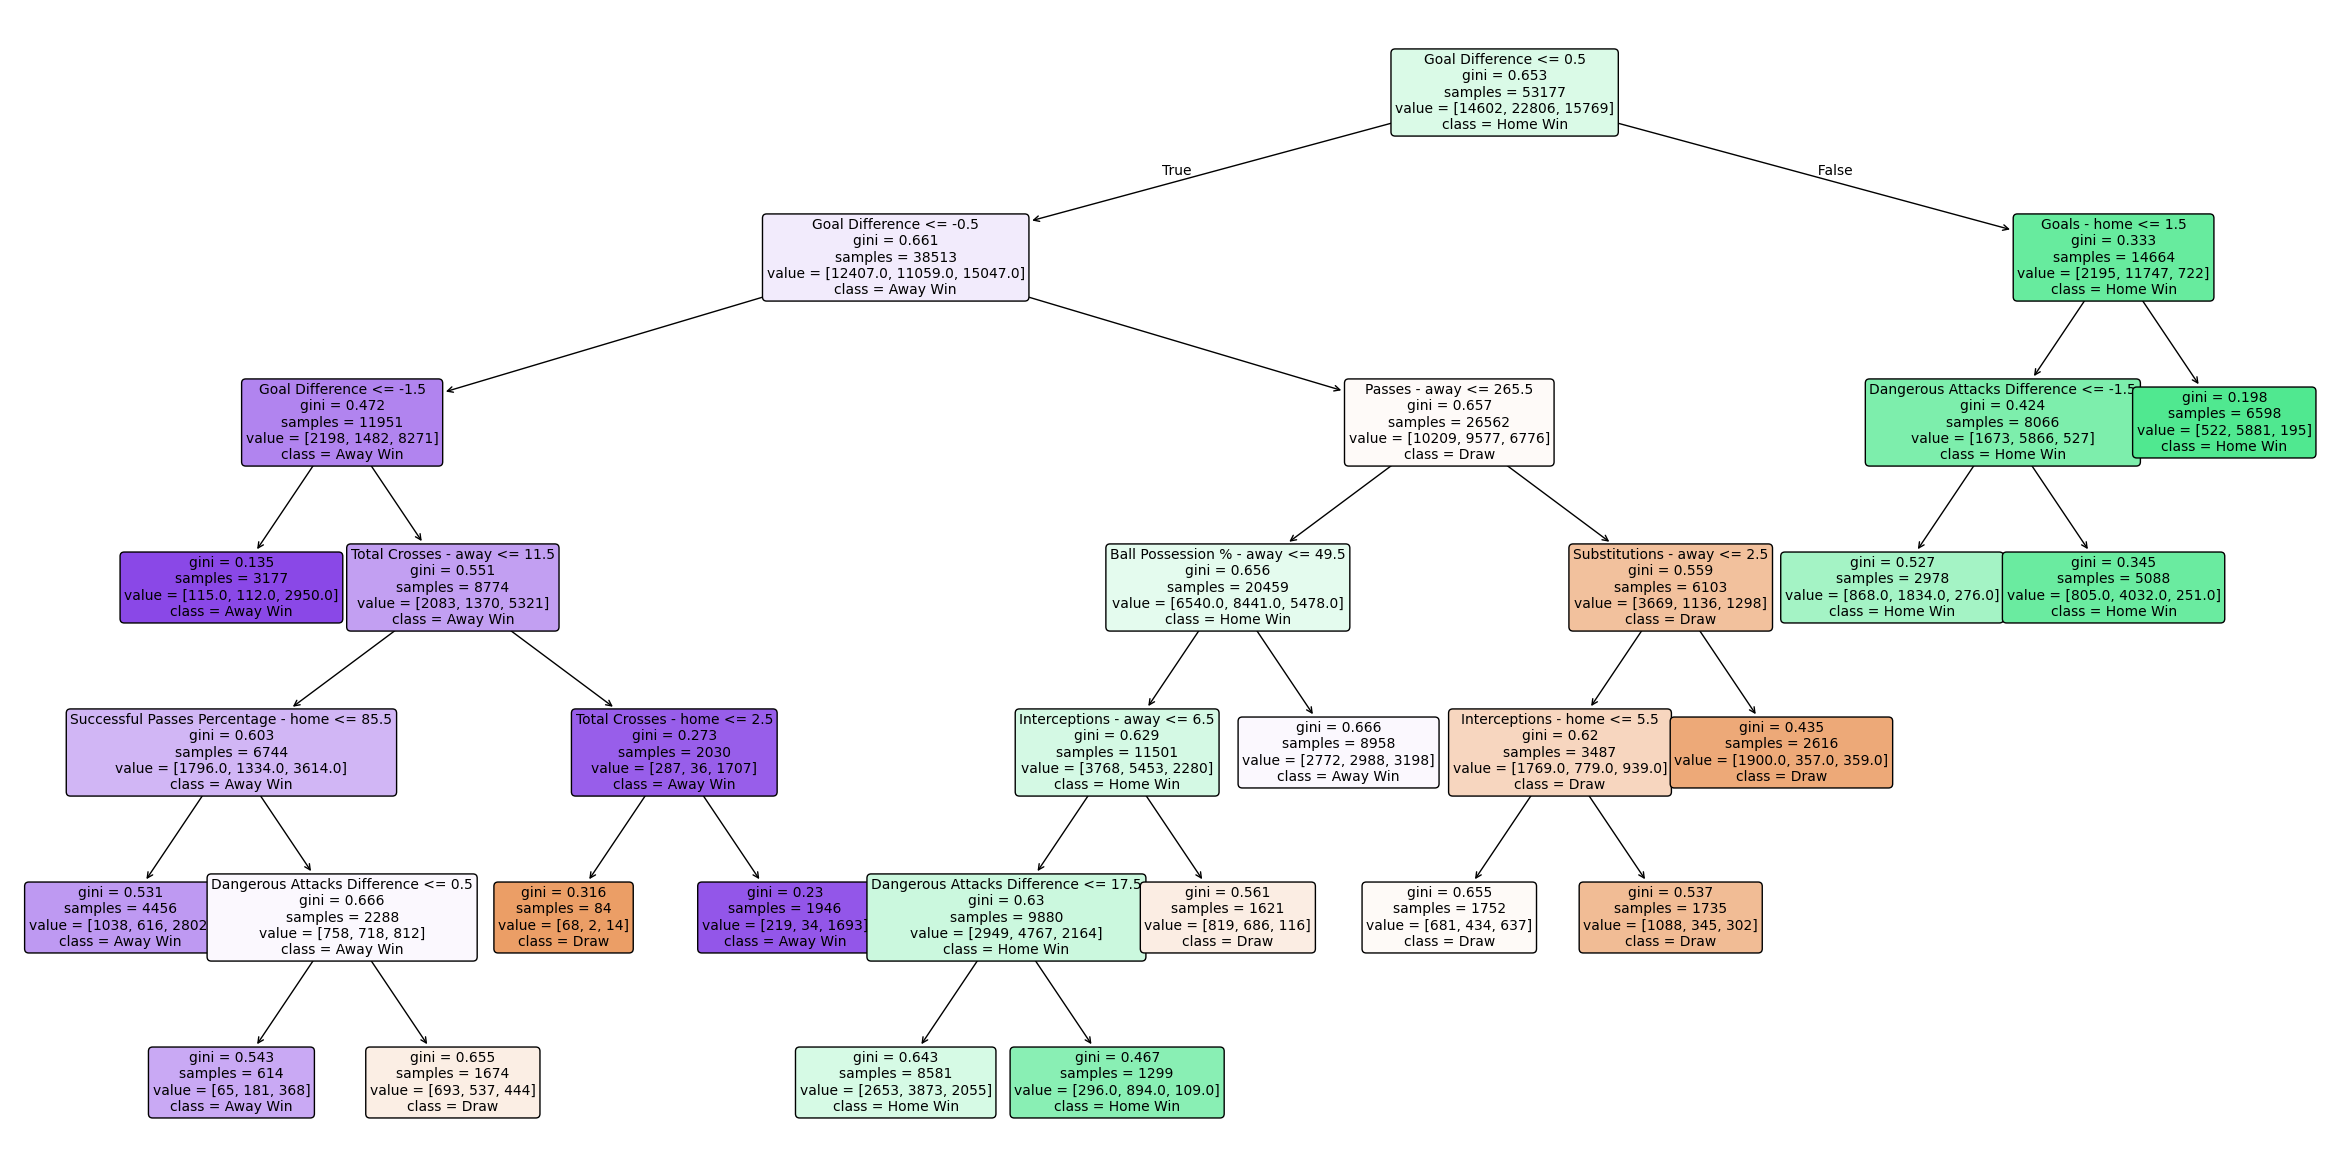

In [330]:
plt.figure(figsize=(30, 15))  

plot_tree(
    classifier,
    feature_names=feature_df.columns,
    class_names=["Draw","Home Win", "Away Win",],
    filled=True,
    fontsize=10,  
    rounded=True)

plt.show()

In [331]:
predict_probs = classifier.predict_proba(feature_df)

predicted_prob_df = pd.DataFrame(
    predict_probs, 
    columns=["Pred{Draw}", "Pred{Home Win}", "Pred{Away Win}"])

df_odds = df[["X", "1", "2"]].copy()
prob_df = 1 / df_odds
prob_df.columns = ["Pr{Draw}", "Pr{Home Win}", "Pr{Away Win}"]
normalized_prob_df = prob_df.div(prob_df.sum(axis=1), axis=0)

compare_df = pd.concat([normalized_prob_df.reset_index(drop=True), predicted_prob_df.reset_index(drop=True)], axis=1)

compare_df["Diff{Draw}"] = compare_df["Pred{Draw}"] - compare_df["Pr{Draw}"]
compare_df["Diff{Home Win}"] = compare_df["Pred{Home Win}"] - compare_df["Pr{Home Win}"]
compare_df["Diff{Away Win}"] = compare_df["Pred{Away Win}"] - compare_df["Pr{Away Win}"]

compare_df

,Pr{Draw},Pr{Home Win},Pr{Away Win},Pred{Draw},Pred{Home Win},Pred{Away Win},Diff{Draw},Diff{Home Win},Diff{Away Win}
0,0.143310,0.763538,0.093152,0.309171,0.451346,0.239483,0.165861,-0.312192,0.146331
1,0.154762,0.773810,0.071429,0.227868,0.688222,0.083911,0.073106,-0.085588,0.012482
2,0.154762,0.773810,0.071429,0.227868,0.688222,0.083911,0.073106,-0.085588,0.012482
3,0.154762,0.773810,0.071429,0.227868,0.688222,0.083911,0.073106,-0.085588,0.012482
4,0.156250,0.781250,0.062500,0.227868,0.688222,0.083911,0.071618,-0.093028,0.021411
...,...,...,...,...,...,...,...,...,...
53172,0.124938,0.867625,0.007437,0.291471,0.615850,0.092680,0.166533,-0.251776,0.085243
53173,0.086805,0.909390,0.003804,0.291471,0.615850,0.092680,0.204665,-0.293541,0.088875
53174,0.086723,0.908531,0.004746,0.291471,0.615850,0.092680,0.204747,-0.292681,0.087934
53175,0.073871,0.923393,0.002736,0.291471,0.615850,0.092680,0.217599,-0.307543,0.089944


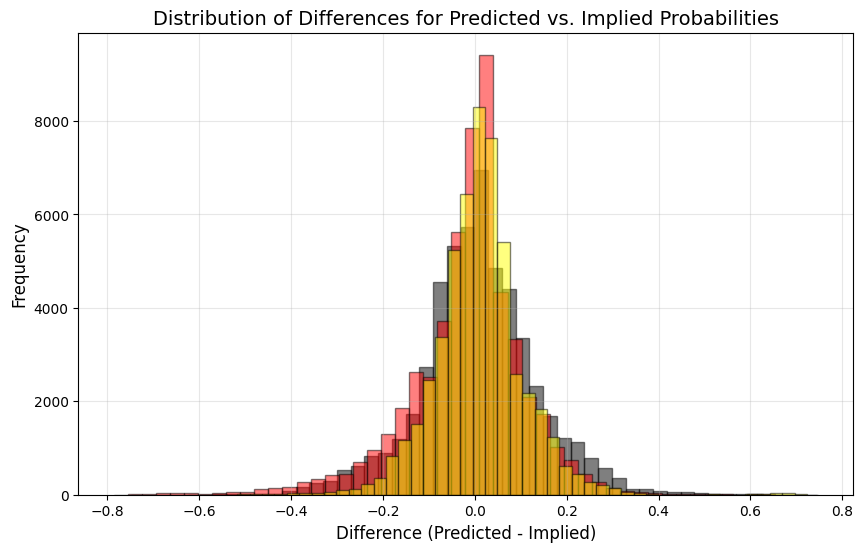

In [338]:
plt.figure(figsize=(10, 6))

compare_df["Diff{Home Win}"].hist(bins=50, alpha=0.5, color='black', edgecolor='black', label="Home Win")
compare_df["Diff{Away Win}"].hist(bins=50, alpha=0.5, color='red', edgecolor='black', label="Away Win")
compare_df["Diff{Draw}"].hist(bins=50, alpha=0.5, color='yellow', edgecolor='black', label="Draw")

plt.title("Distribution of Differences for Predicted vs. Implied Probabilities", fontsize=14)
plt.xlabel("Difference (Predicted - Implied)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)

plt.grid(alpha=0.3)

plt.show()